# imports

In [44]:
import sys
sys.path.append('../')

import numpy as np
import optuna
import torch
import pickle

# NDN tools
import NDNT.utils as utils # some other utilities
import NDNT.NDNT as NDN
from NDNT.modules.layers import *
from NDNT.networks import *
from time import time

import matplotlib
import matplotlib.pyplot as plt
import ColorDataUtils.mattplotlib as mplt
from ColorDataUtils.multidata_utils import MultiExperiment
from NDNT.utils import imagesc   # because I'm lazy
from NDNT.utils import ss        # because I'm real lazy

device = torch.device("cuda:1")
dtype = torch.float32

datadir = '/home/dbutts/ColorV1/Data/'
dirname = '/home/dbutts/ColorV1/CLRworkspace/'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load models

In [46]:
class Model:
    def __init__(self, ndn_model, LLs):
        self.ndn = ndn_model
        self.LLs = LLs

with open('../models/cnns_multi_06_1x/cnn_0.pkl', 'rb') as f:
    model_1x = pickle.load(f)
with open('../models/cnns_multi_06_2x/cnn_0.pkl', 'rb') as f:
    model_2x = pickle.load(f)

cnn_1x = model_1x.ndn_model
cnn_2x = model_2x.ndn_model

print(np.mean(model_1x.LLs), np.mean(model_2x.LLs[:len(model_2x.LLs)//2]))

FileNotFoundError: [Errno 2] No such file or directory: '../models/cnns_multi_06_1x/cnn_0.pkl'

In [19]:
#layer_bounds_1x, readout_weights_1x = mplt.plot_readout_weights(cnn_1x)

In [18]:
#layer_bounds_2x, readout_weights_2x = mplt.plot_readout_weights(cnn_2x)

# compare weights

## compare LGN

(7, 7, 14, 4) (7, 7, 14, 4)


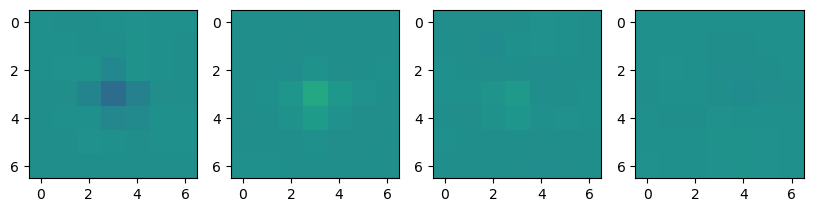

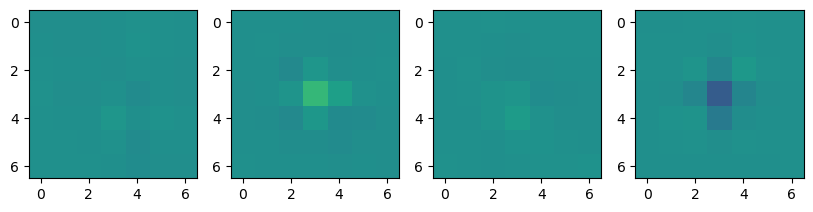

In [35]:
# get LGN weights
lgn_weights_1x = cnn_1x.networks[0].layers[0].get_weights()
lgn_weights_2x = cnn_2x.networks[0].layers[0].get_weights()
print(lgn_weights_1x.shape, lgn_weights_2x.shape)

# plot side-by-side and compare
lgn_max = np.max(lgn_weights_1x)
fig = plt.figure(figsize=(10,4))
grid = matplotlib.gridspec.GridSpec(nrows=1, ncols=4)
for i in range(4):
    ax = fig.add_subplot(grid[0, i])
    ax.imshow(lgn_weights_1x[:,:,7,i], interpolation='none', vmin=-lgn_max, vmax=lgn_max)

# plot side-by-side and compare
lgn_max = np.max(lgn_weights_2x)
fig = plt.figure(figsize=(10,4))
grid = matplotlib.gridspec.GridSpec(nrows=1, ncols=4)
for i in range(4):
    ax = fig.add_subplot(grid[0, i])
    ax.imshow(lgn_weights_2x[:,:,7,i], interpolation='none', vmin=-lgn_max, vmax=lgn_max)

## compare proj

(4, 21, 21, 38) (4, 21, 21, 38)


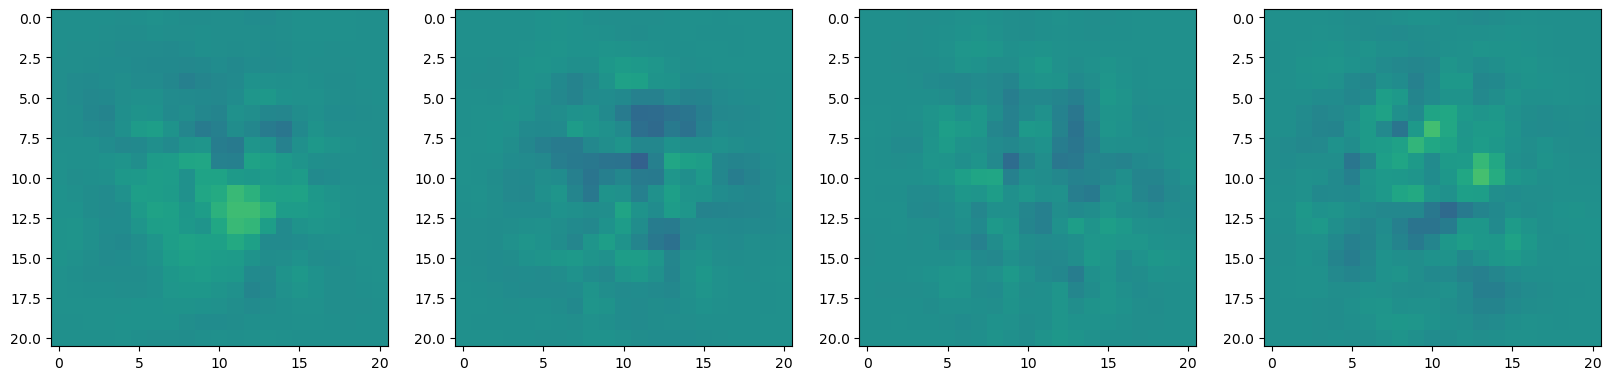

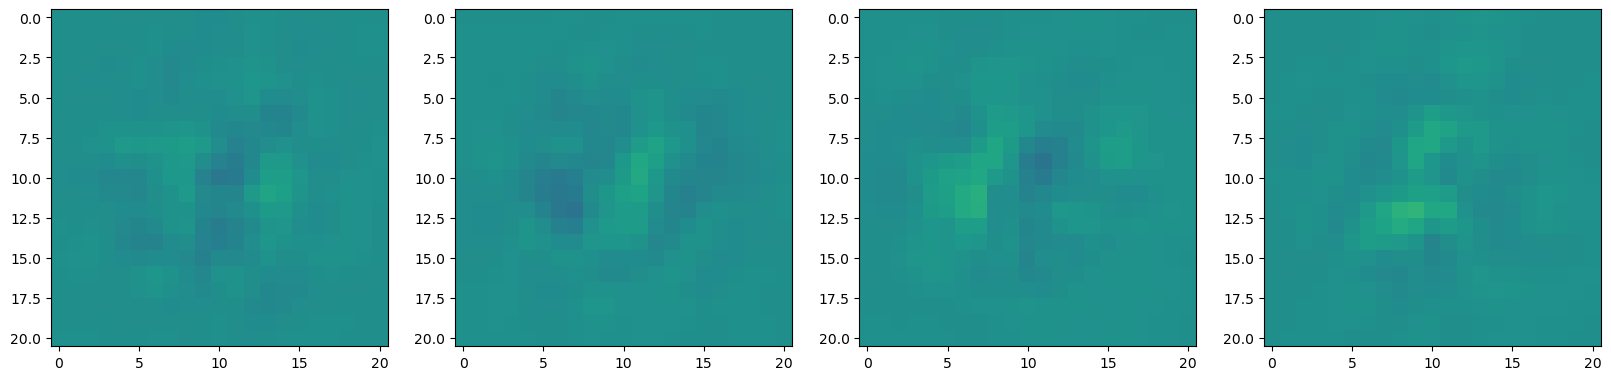

In [38]:
# get LGN weights
proj_weights_1x = cnn_1x.networks[0].layers[1].get_weights()
proj_weights_2x = cnn_2x.networks[0].layers[1].get_weights()
print(proj_weights_1x.shape, proj_weights_2x.shape)

# plot side-by-side and compare
proj_max = np.max(proj_weights_1x)
fig = plt.figure(figsize=(20,6))
grid = matplotlib.gridspec.GridSpec(nrows=1, ncols=4)
for i in range(4):
    ax = fig.add_subplot(grid[0, i])
    ax.imshow(proj_weights_1x[i,:,:,19], interpolation='none', vmin=-proj_max, vmax=proj_max)

# plot side-by-side and compare
proj_max = np.max(proj_weights_2x)
fig = plt.figure(figsize=(20,6))
grid = matplotlib.gridspec.GridSpec(nrows=1, ncols=4)
for i in range(4):
    ax = fig.add_subplot(grid[0, i])
    ax.imshow(proj_weights_2x[i,:,:,19], interpolation='none', vmin=-proj_max, vmax=proj_max)

## compare iter

(38, 9, 9, 38) (38, 9, 9, 38)


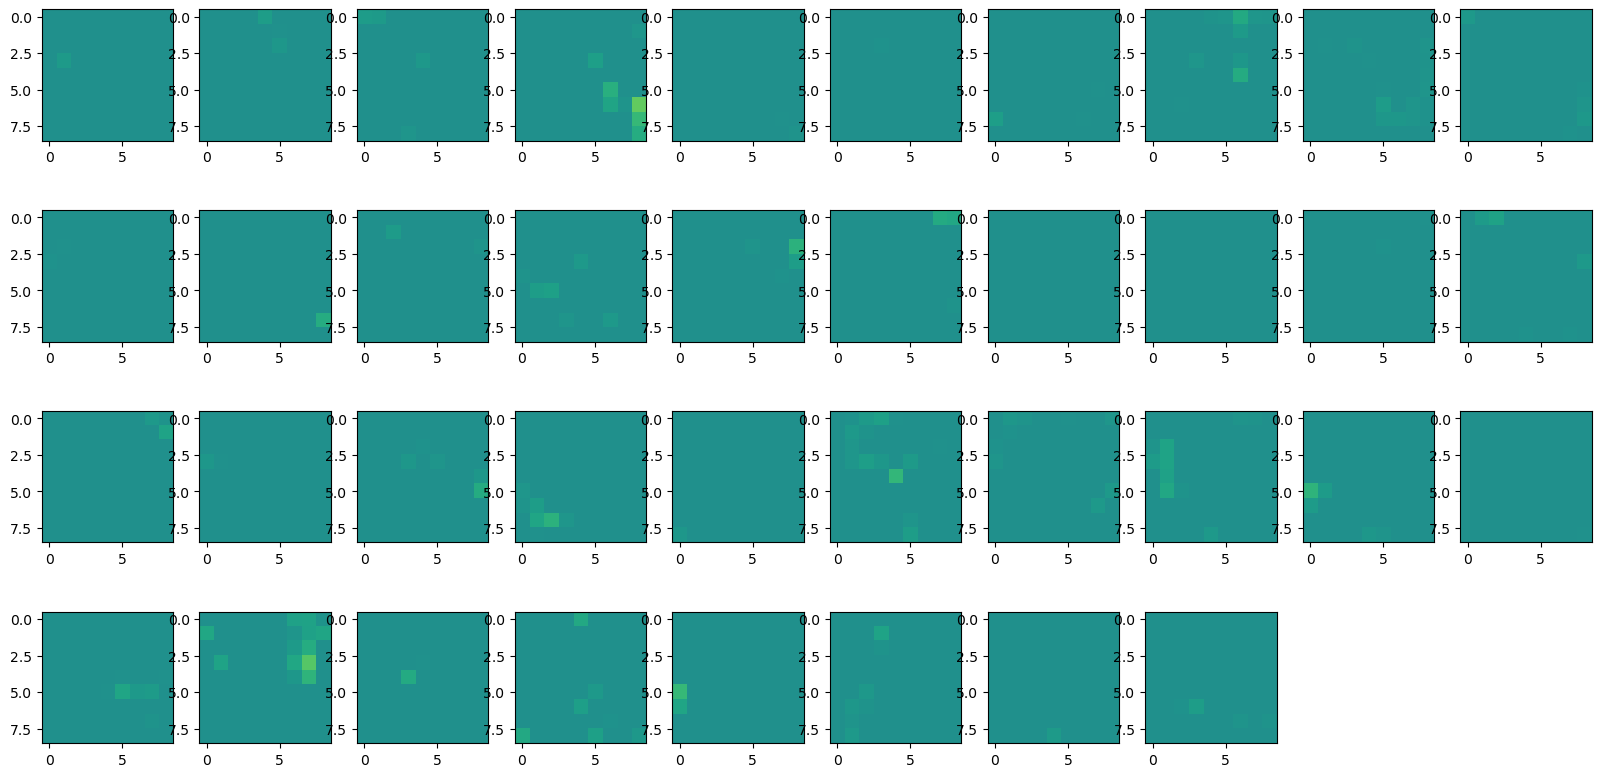

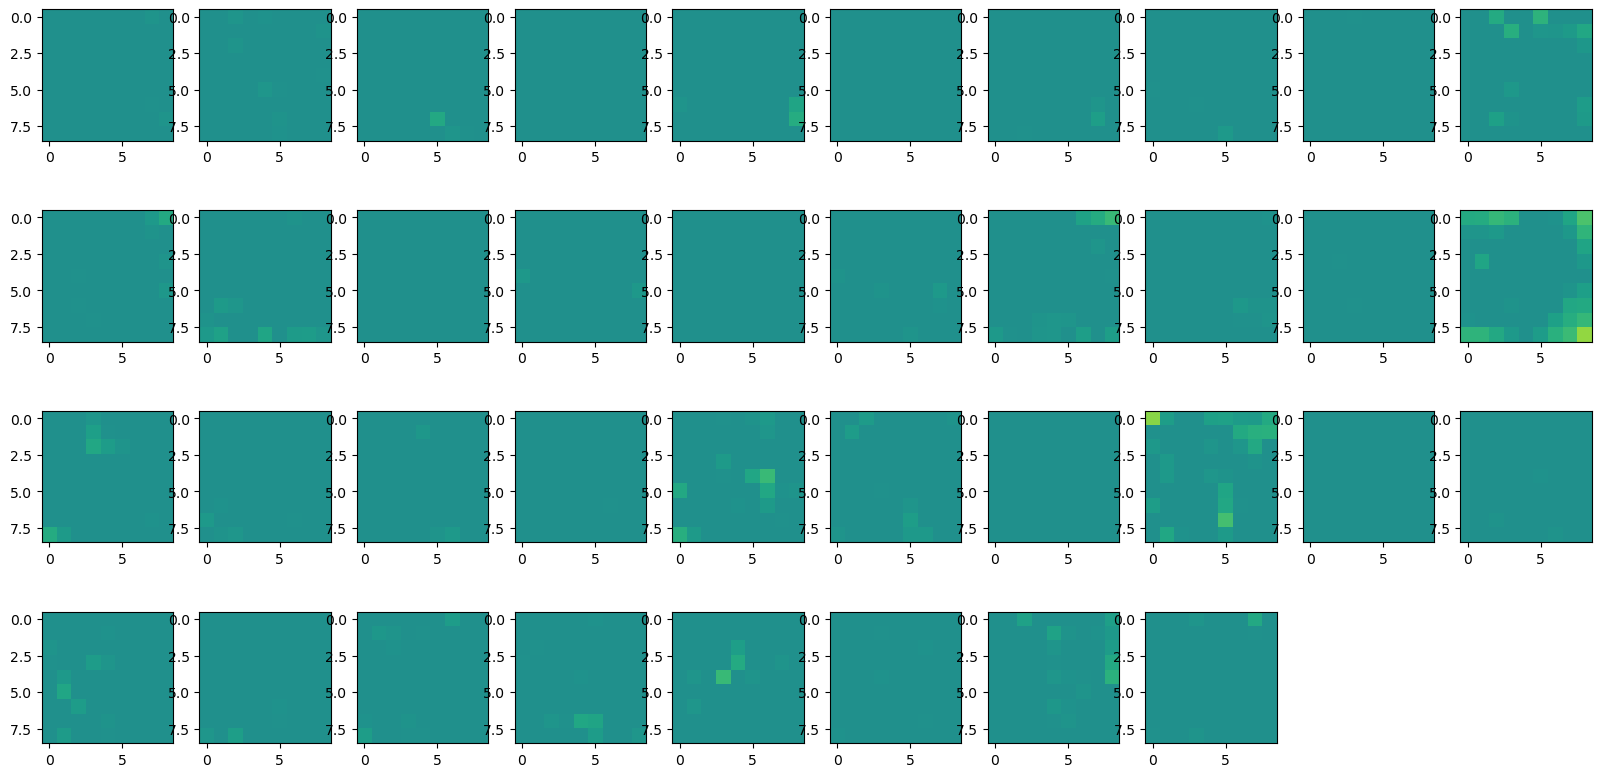

In [41]:
# get LGN weights
iter_weights_1x = cnn_1x.networks[0].layers[2].get_weights()
iter_weights_2x = cnn_2x.networks[0].layers[2].get_weights()
print(iter_weights_1x.shape, iter_weights_2x.shape)

# plot side-by-side and compare
iter_max = np.max(iter_weights_1x)
fig = plt.figure(figsize=(20,10))
grid = matplotlib.gridspec.GridSpec(nrows=4, ncols=10)
for i in range(38):
    row,col = np.unravel_index(i, (4,10))
    ax = fig.add_subplot(grid[row,col])
    ax.imshow(iter_weights_1x[i,:,:,19], interpolation='none', vmin=-iter_max, vmax=iter_max)

# plot side-by-side and compare
iter_max = np.max(iter_weights_2x)
fig = plt.figure(figsize=(20,10))
grid = matplotlib.gridspec.GridSpec(nrows=4, ncols=10)
for i in range(38):
    row,col = np.unravel_index(i, (4,10))
    ax = fig.add_subplot(grid[row,col])
    ax.imshow(iter_weights_2x[i,:,:,19], interpolation='none', vmin=-iter_max, vmax=iter_max)

## compare readout

In [42]:
readout_weights_1x.shape, readout_weights_2x.shape

((228, 174), (228, 348))